# Phân tích kết quả mô hình dự đoán giá xe (Phiên bản rút gọn)

Notebook này hiển thị và phân tích các kết quả chính từ việc huấn luyện mô hình dự đoán giá xe ô tô.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Image

# Thiết lập style cho biểu đồ
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Thiết lập đường dẫn

In [2]:
# Đường dẫn đến thư mục processed và models
PROCESSED_DIR = r'D:\New folder\MachineLearning\data\processed'
MODELS_DIR = os.path.join(PROCESSED_DIR, 'models')

# Đảm bảo đường dẫn tồn tại
if not os.path.exists(MODELS_DIR):
    print(f"Thư mục {MODELS_DIR} không tồn tại. Vui lòng chạy train_price_model.py trước.")
else:
    print(f"Đã tìm thấy thư mục models tại {MODELS_DIR}")

Thư mục D:\New folder\MachineLearning\data\processed\models không tồn tại. Vui lòng chạy train_price_model.py trước.


## 2. So sánh hiệu suất các mô hình

Hiển thị kết quả so sánh hiệu suất giữa các mô hình máy học đã huấn luyện để dự đoán giá xe.

In [3]:
# Đọc biểu đồ so sánh mô hình
model_comparison_path = os.path.join(MODELS_DIR, 'model_comparison.png')

# Kiểm tra file có tồn tại không
if os.path.exists(model_comparison_path):
    # Hiển thị biểu đồ
    display(Image(filename=model_comparison_path))
    print("Biểu đồ so sánh các mô hình dự đoán giá xe:")
    print("- Trái: R² Score - chỉ số càng cao (gần 1) càng tốt")
    print("- Phải: RMSE - sai số bình phương trung bình gốc, càng thấp càng tốt")
else:
    print(f"Không tìm thấy file {model_comparison_path}")

Không tìm thấy file D:\New folder\MachineLearning\data\processed\models\model_comparison.png



Biểu đồ so sánh giá dự đoán và giá thực tế:


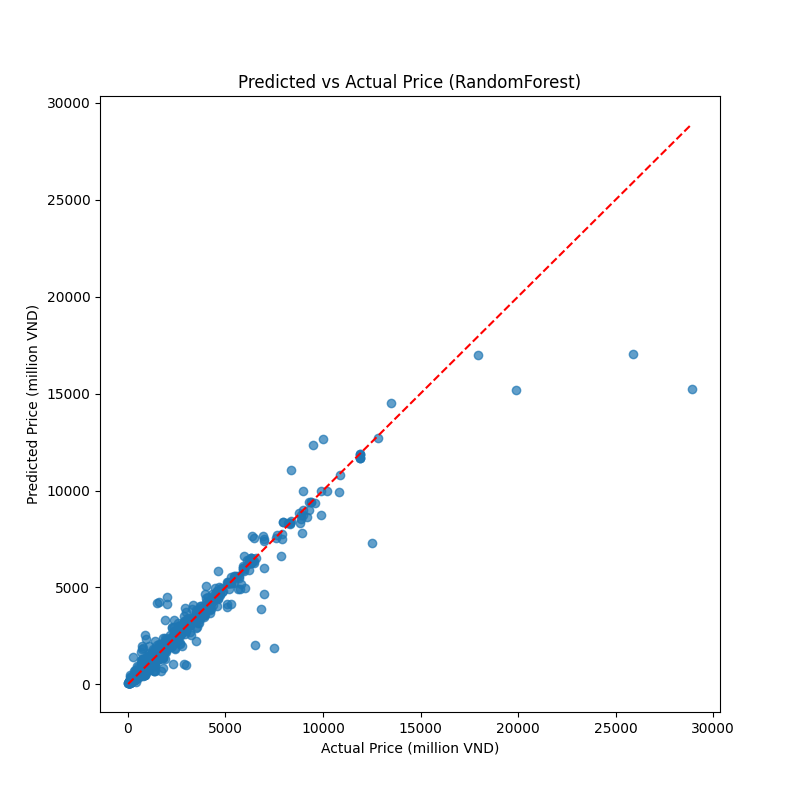

- Đường chéo đỏ thể hiện dự đoán hoàn hảo (giá dự đoán = giá thực tế)
- Các điểm càng gần đường chéo càng tốt


In [8]:
# Hiển thị biểu đồ dự đoán vs thực tế
prediction_vs_actual_path = os.path.join(MODELS_DIR, 'prediction_vs_actual.png')

if os.path.exists(prediction_vs_actual_path):
    print("\nBiểu đồ so sánh giá dự đoán và giá thực tế:")
    display(Image(filename=prediction_vs_actual_path))
    print("- Đường chéo đỏ thể hiện dự đoán hoàn hảo (giá dự đoán = giá thực tế)")
    print("- Các điểm càng gần đường chéo càng tốt")
else:
    print(f"Không tìm thấy file {prediction_vs_actual_path}")

## 3. Phân tích tầm quan trọng của các đặc trưng

Hiển thị và phân tích các đặc trưng quan trọng nhất ảnh hưởng đến giá xe.

In [4]:
# Hiển thị biểu đồ tầm quan trọng của các đặc trưng
feature_importance_path = os.path.join(MODELS_DIR, 'feature_importance.png')

if os.path.exists(feature_importance_path):
    print("Biểu đồ thể hiện tầm quan trọng của các đặc trưng:")
    display(Image(filename=feature_importance_path))
else:
    print(f"Không tìm thấy file {feature_importance_path}")

Không tìm thấy file D:\New folder\MachineLearning\data\processed\models\feature_importance.png


### Phân tích tầm quan trọng của các đặc trưng

Dựa trên biểu đồ tầm quan trọng của các đặc trưng, chúng ta có thể thấy:

1. **Dung tích động cơ (engine_capacity)**: Đây là đặc trưng có ảnh hưởng lớn nhất đến giá xe, chiếm khoảng 50% tầm quan trọng. Xe có động cơ lớn hơn thường có giá cao hơn.

2. **Tuổi xe/Năm sản xuất (car_age/year)**: Đây là nhóm đặc trưng quan trọng thứ hai, chiếm khoảng 20% tổng tầm quan trọng. Xe càng mới thì giá càng cao.

3. **Thương hiệu (brand)**: Thương hiệu xe, đặc biệt là các thương hiệu cao cấp như Mercedes, cũng ảnh hưởng đáng kể đến giá xe.

4. **Kiểu dáng xe (body_type)**: Loại xe (SUV, sedan, v.v.) cũng ảnh hưởng đến giá, với SUV thường có giá cao hơn so với sedan.

5. **Xuất xứ (is_imported)**: Xe nhập khẩu thường có giá cao hơn so với xe lắp ráp trong nước.

## 4. Kết luận và đề xuất

### Kết luận:
- Mô hình dự đoán giá xe đã được huấn luyện thành công với nhiều thuật toán khác nhau
- Các đặc trưng quan trọng nhất ảnh hưởng đến giá xe gồm: dung tích động cơ, tuổi xe, năm sản xuất và thương hiệu

### Đề xuất cải thiện:
1. **Bổ sung dữ liệu**: Thu thập thêm dữ liệu để tăng độ chính xác của mô hình
2. **Tối ưu mô hình**: Điều chỉnh siêu tham số để cải thiện hiệu suất
3. **Bổ sung đặc trưng**: Thêm các đặc trưng như số km đã đi, tình trạng xe, số chỗ ngồi
4. **Phân đoạn mô hình**: Xây dựng các mô hình riêng cho từng phân khúc xe